In [71]:
#import dependencies
import pandas as pd
from sqlalchemy import create_engine, inspect
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [72]:
# Create a connection to the database
# CODE FROM CLASS WEEK 10 DAY 2 ACT 8
database_path = "Resources/hawaii.sqlite"
connection_str = f"sqlite:///{database_path}"
print(connection_str)

engine = create_engine(connection_str)

sqlite:///Resources/hawaii.sqlite


In [73]:
# create the inspector and connect to the engine
# CODE FROM CLASS WEEK 10 DAY 2 ACT 8
inspector= inspect(engine)

tables = inspector.get_table_names()
for table in tables:
    print(table)
    
    # get all columns in table
    columns = inspector.get_columns(table)
    for column in columns:
        print(column)
    print()

measurement
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}

station
{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'name', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'latitude', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoi

In [74]:
#LOOKING AT THE DATA and creating df for measurment
query = "SELECT * from measurement LIMIT 20;"
df = pd.read_sql(query, engine)
df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [75]:
#LOOKING AT THE DATA and creating df for station
query = "SELECT * from station LIMIT 20;"
df = pd.read_sql(query, engine)
df.head(9)

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


MOST RECENT DATE IN DATASET

In [76]:
query="""
    SELECT
        MAX(date)
    FROM
        measurement
    
    
    """

engine.execute(query).fetchall()

[('2017-08-23',)]

DATE AND PRCP VALUES FOR PREVIOUS 12 MONTHS as df 

In [77]:
query="""
    SELECT
        date,
        prcp
    FROM
        measurement
    WHERE
        date>= '2016-08-23'
        and prcp is not null
    order by
        date asc;
    
    """
df = pd.read_sql(query, engine)
df.head(9)

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.02
4,2016-08-23,1.79
5,2016-08-23,0.70
6,2016-08-24,0.08
7,2016-08-24,2.15
8,2016-08-24,2.28


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2021 non-null   object 
 1   prcp    2021 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.7+ KB


Need to convert date to datetime

In [79]:
df["date"]=pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2021 entries, 0 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2021 non-null   datetime64[ns]
 1   prcp    2021 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.7 KB


Graph of Precipiation for the last year. SEEMS TO BE MORE RAINY IN MARCH AND MAY

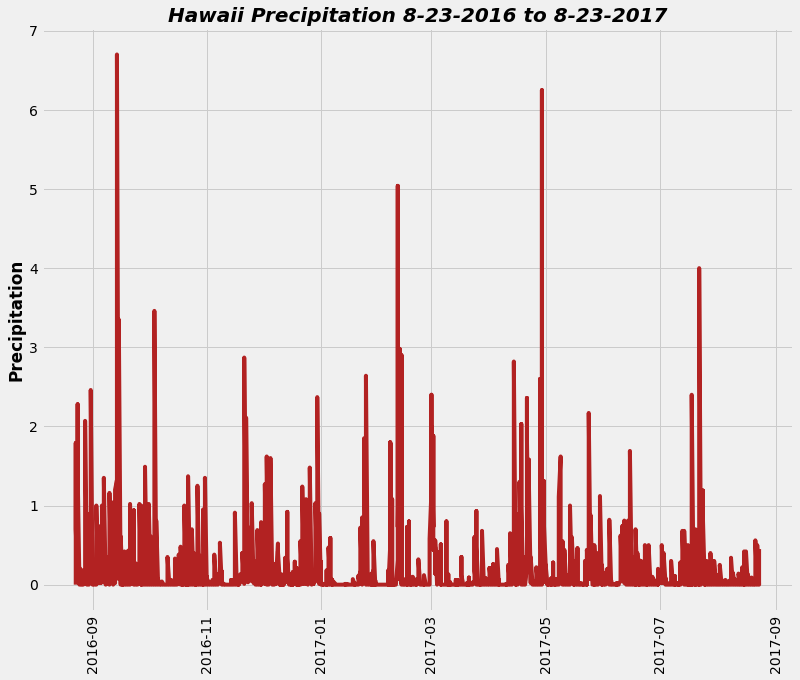

In [80]:
plt.figure(figsize=(12,10))
plt.plot(df["date"],df.prcp, color="firebrick")
plt.ylabel('Precipitation', weight='bold')
plt.title("Hawaii Precipitation 8-23-2016 to 8-23-2017", weight='bold', fontstyle='italic',size=20)
plt.xticks(rotation=90)
plt.show()


Summary statistics for precipitation

In [81]:
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Station Analysis

In [82]:
#Design a query to calculate the total number of stations in the dataset.
query="Select Count(*)FROM station"
engine.execute(query).fetchall()

[(9,)]

JOIN

In [83]:
#Design a query to find the most-active stations (that is, the stations that have the most rows). 
# Station USC00519281 has the most observations
query = """SELECT
                station.station,
                count(measurement.id) as obs
            FROM
                measurement
                JOIN station on measurement.station=station.station
            Group By
                station.station
            Order by
                obs desc;
                    
        """

df = pd.read_sql(query, engine)
df.head()



,station,obs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [84]:
#Design a query that calculates the lowest, highest, and average temperatures that filters on the most-active station id found in the previous query.

query = """
        SELECT
            min(tobs) as min_t,
            max(tobs) as max_t,
            round(avg(tobs)) as avg_t
        From
            measurement
        Where
            station="USC00519281"
        
        
        
        
        """
df = pd.read_sql(query, engine)
df.head()

,min_t,max_t,avg_t
0,54.0,85.0,72.0


Design a query to get the previous 12 months of temperature observation (TOBS) data.

In [85]:
query="""
    SELECT
        date,
        tobs
    FROM
        measurement
    WHERE
        date>= '2016-08-23'
        and tobs is not null
        and station="USC00519281"
    order by
        date asc;
    
    """

df = pd.read_sql(query, engine)
df["date"]=pd.to_datetime(df["date"])
df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


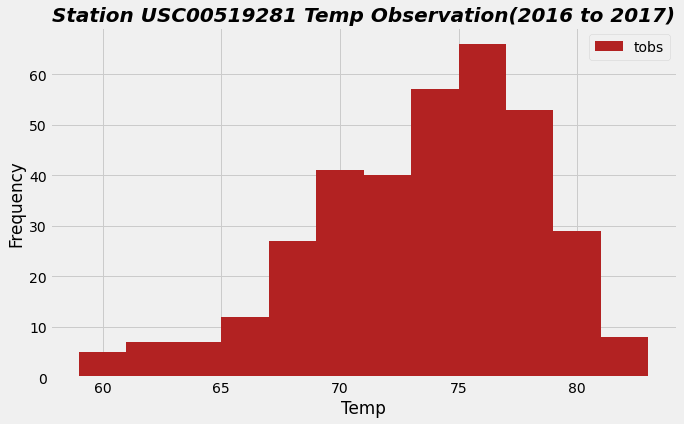

In [86]:
plt.figure(figsize=(10,6))
plt.hist(df.tobs, bins=12, color='firebrick')
plt.title("Station USC00519281 Temp Observation(2016 to 2017)",weight="bold",style="italic",size=20)
plt.ylabel('Frequency')
plt.xlabel('Temp')
labels = ['tobs']
plt.legend(labels,loc="best")
plt.show()

CONCLUSION:
EVERYONE SHOULD MOVE TO HAWAII

In [87]:
engine.dispose()